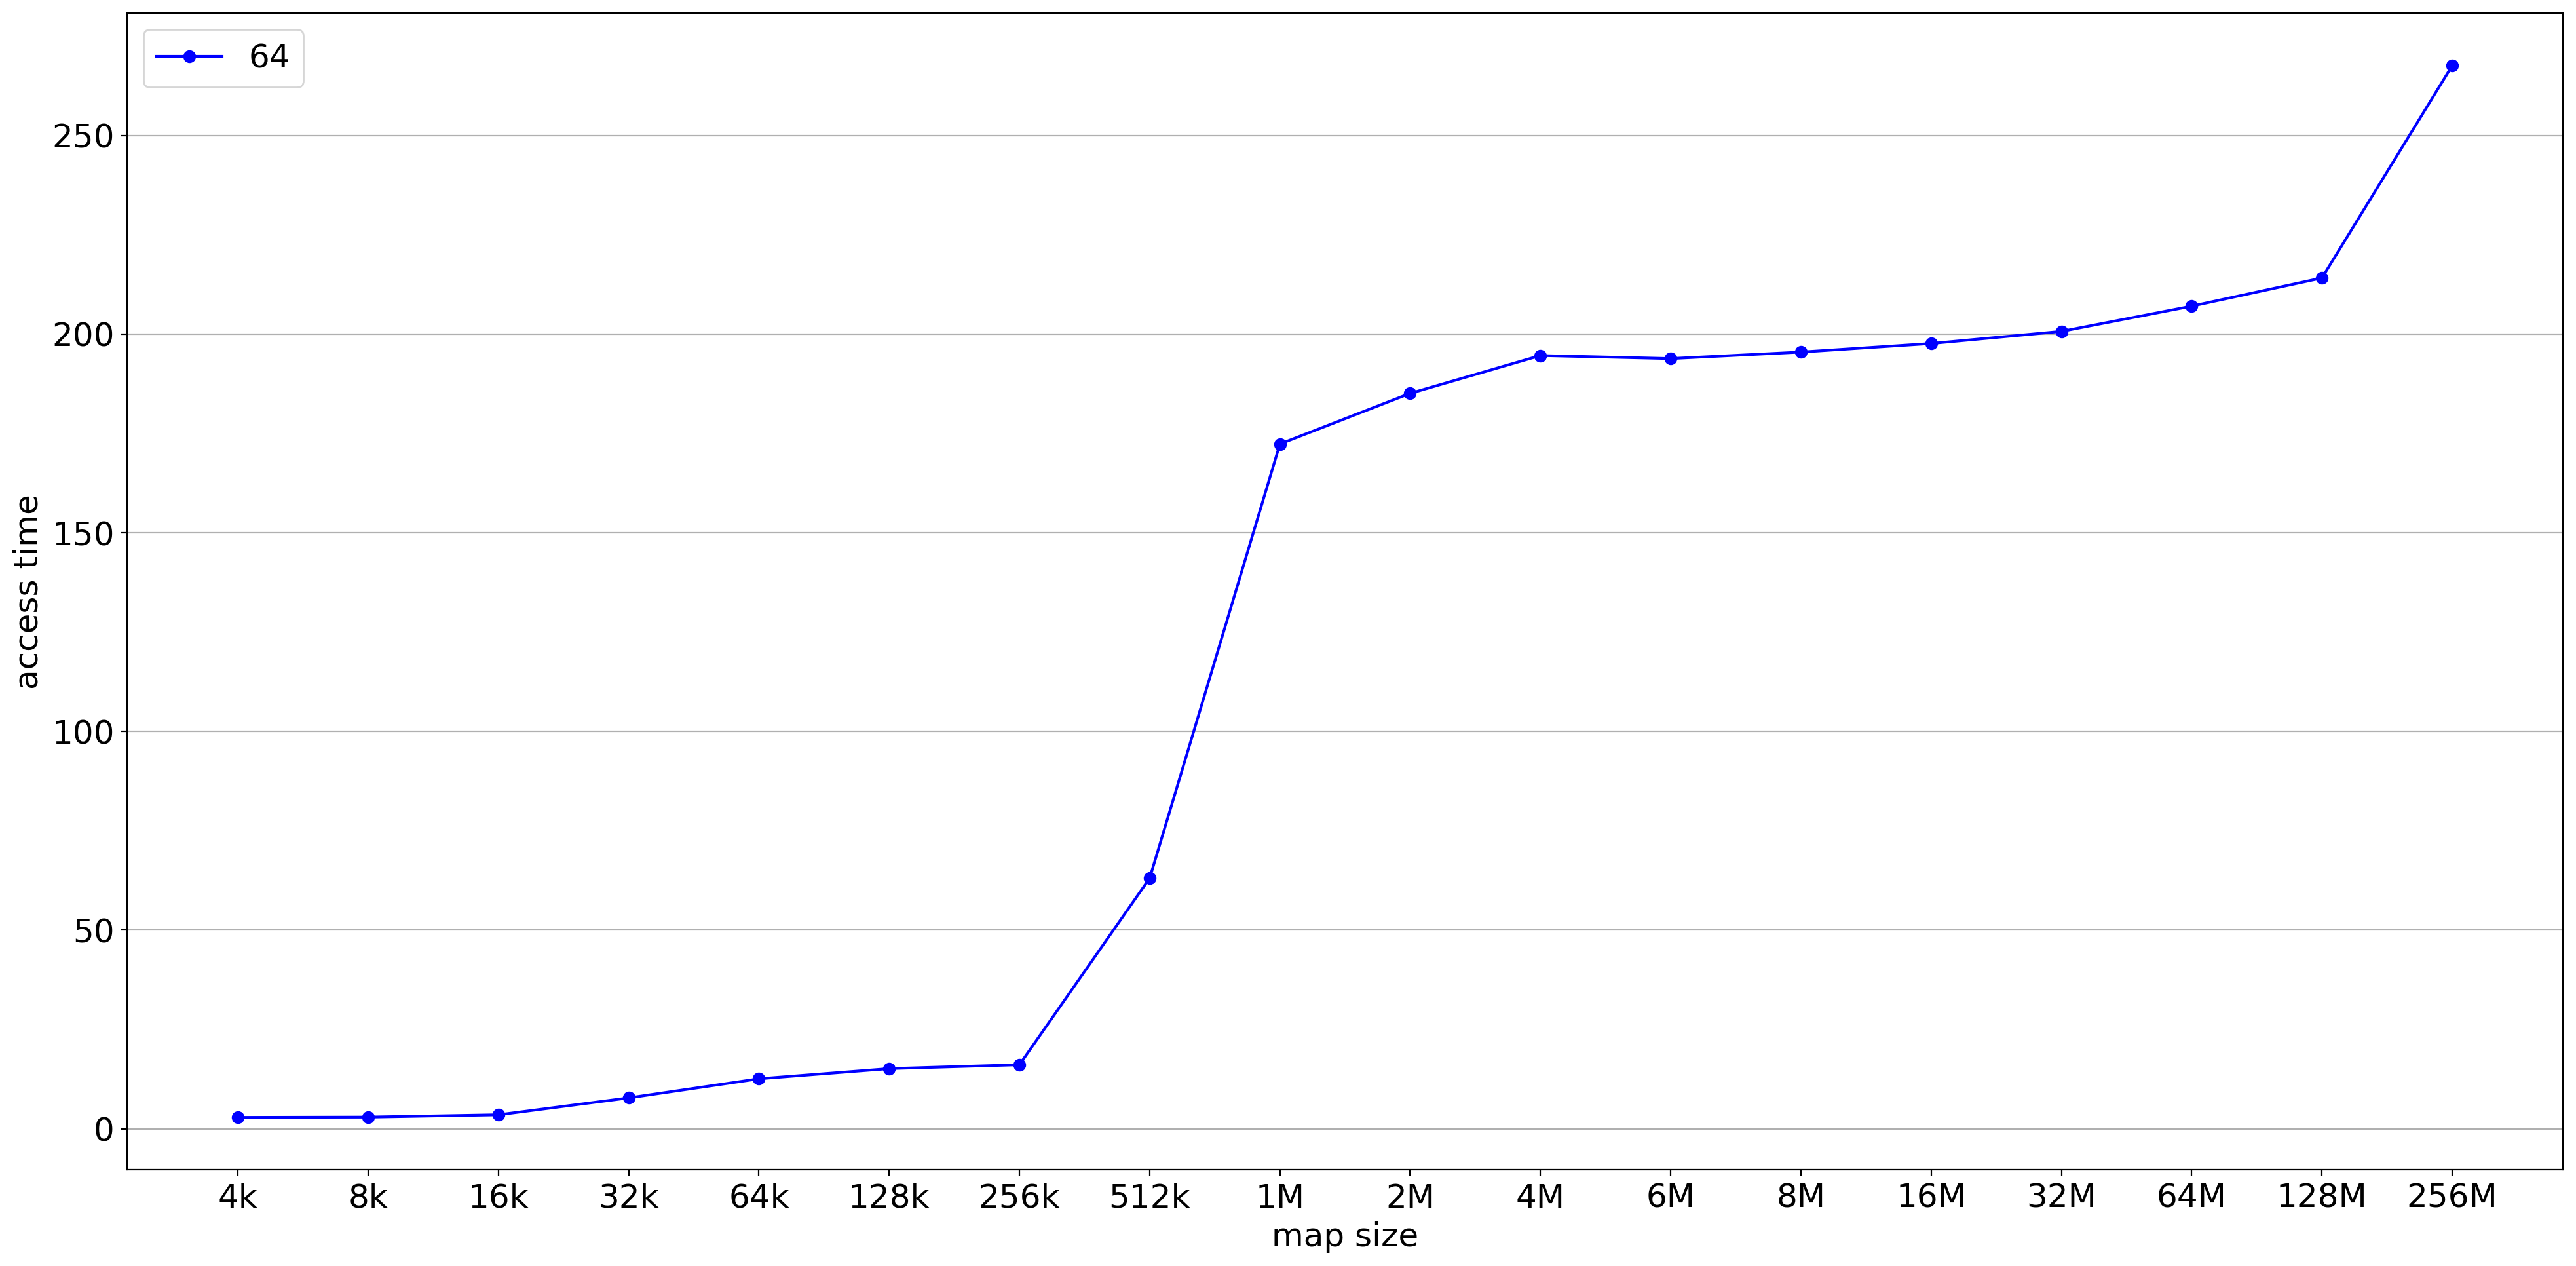

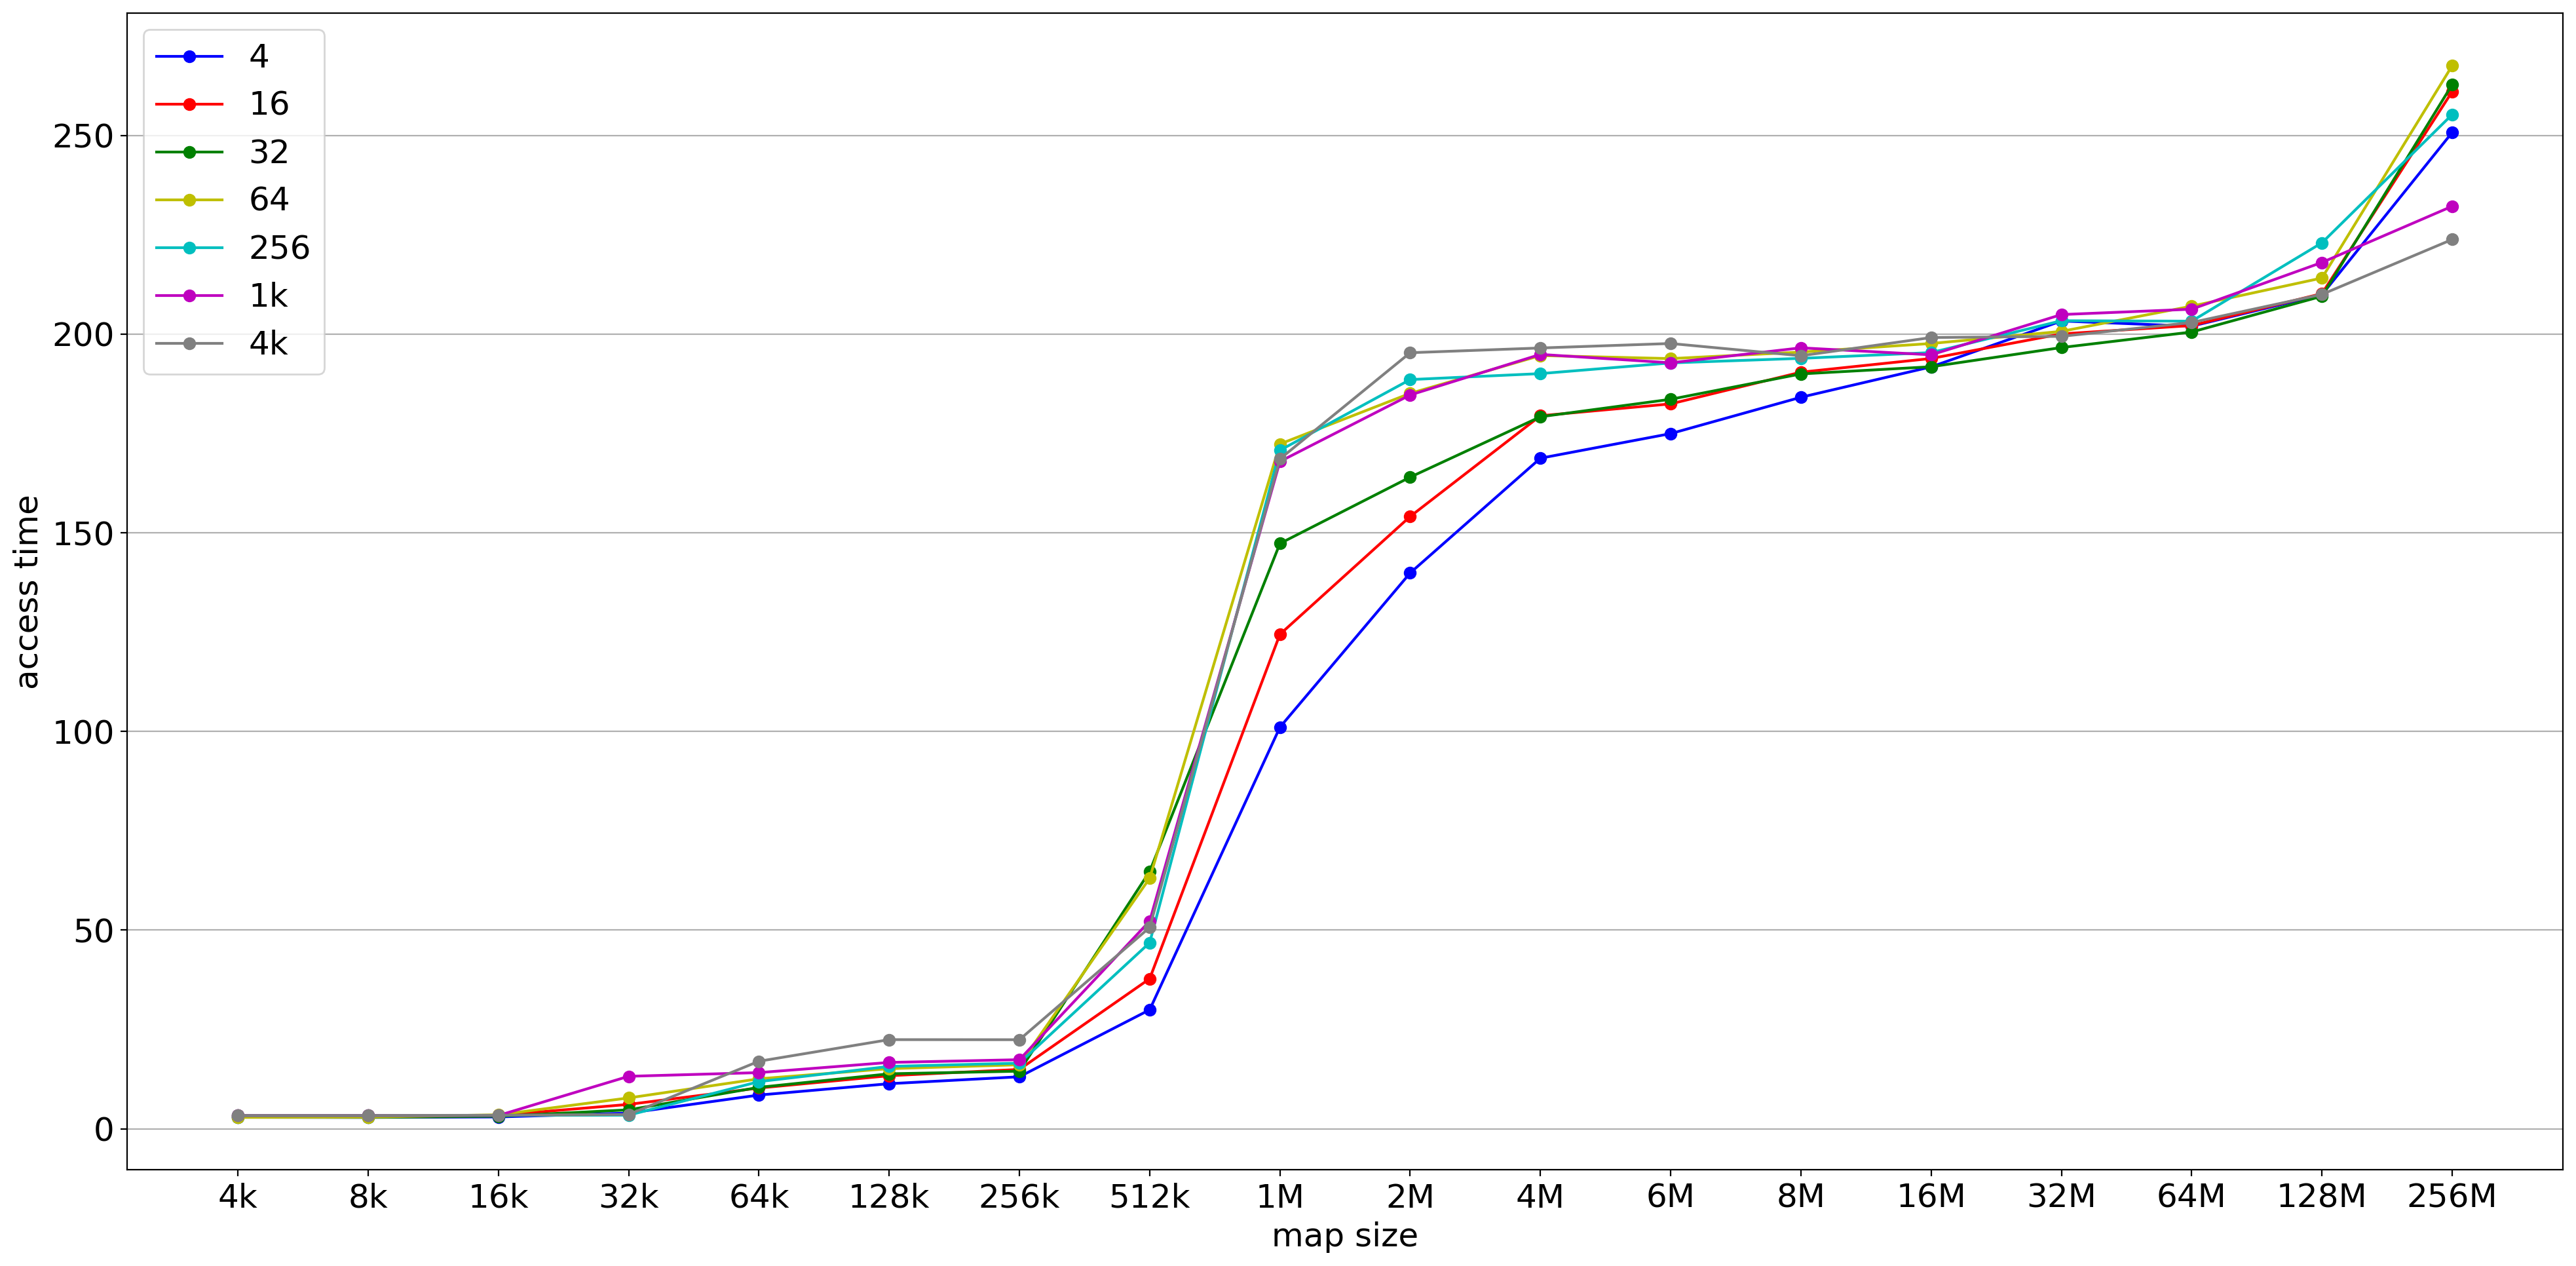

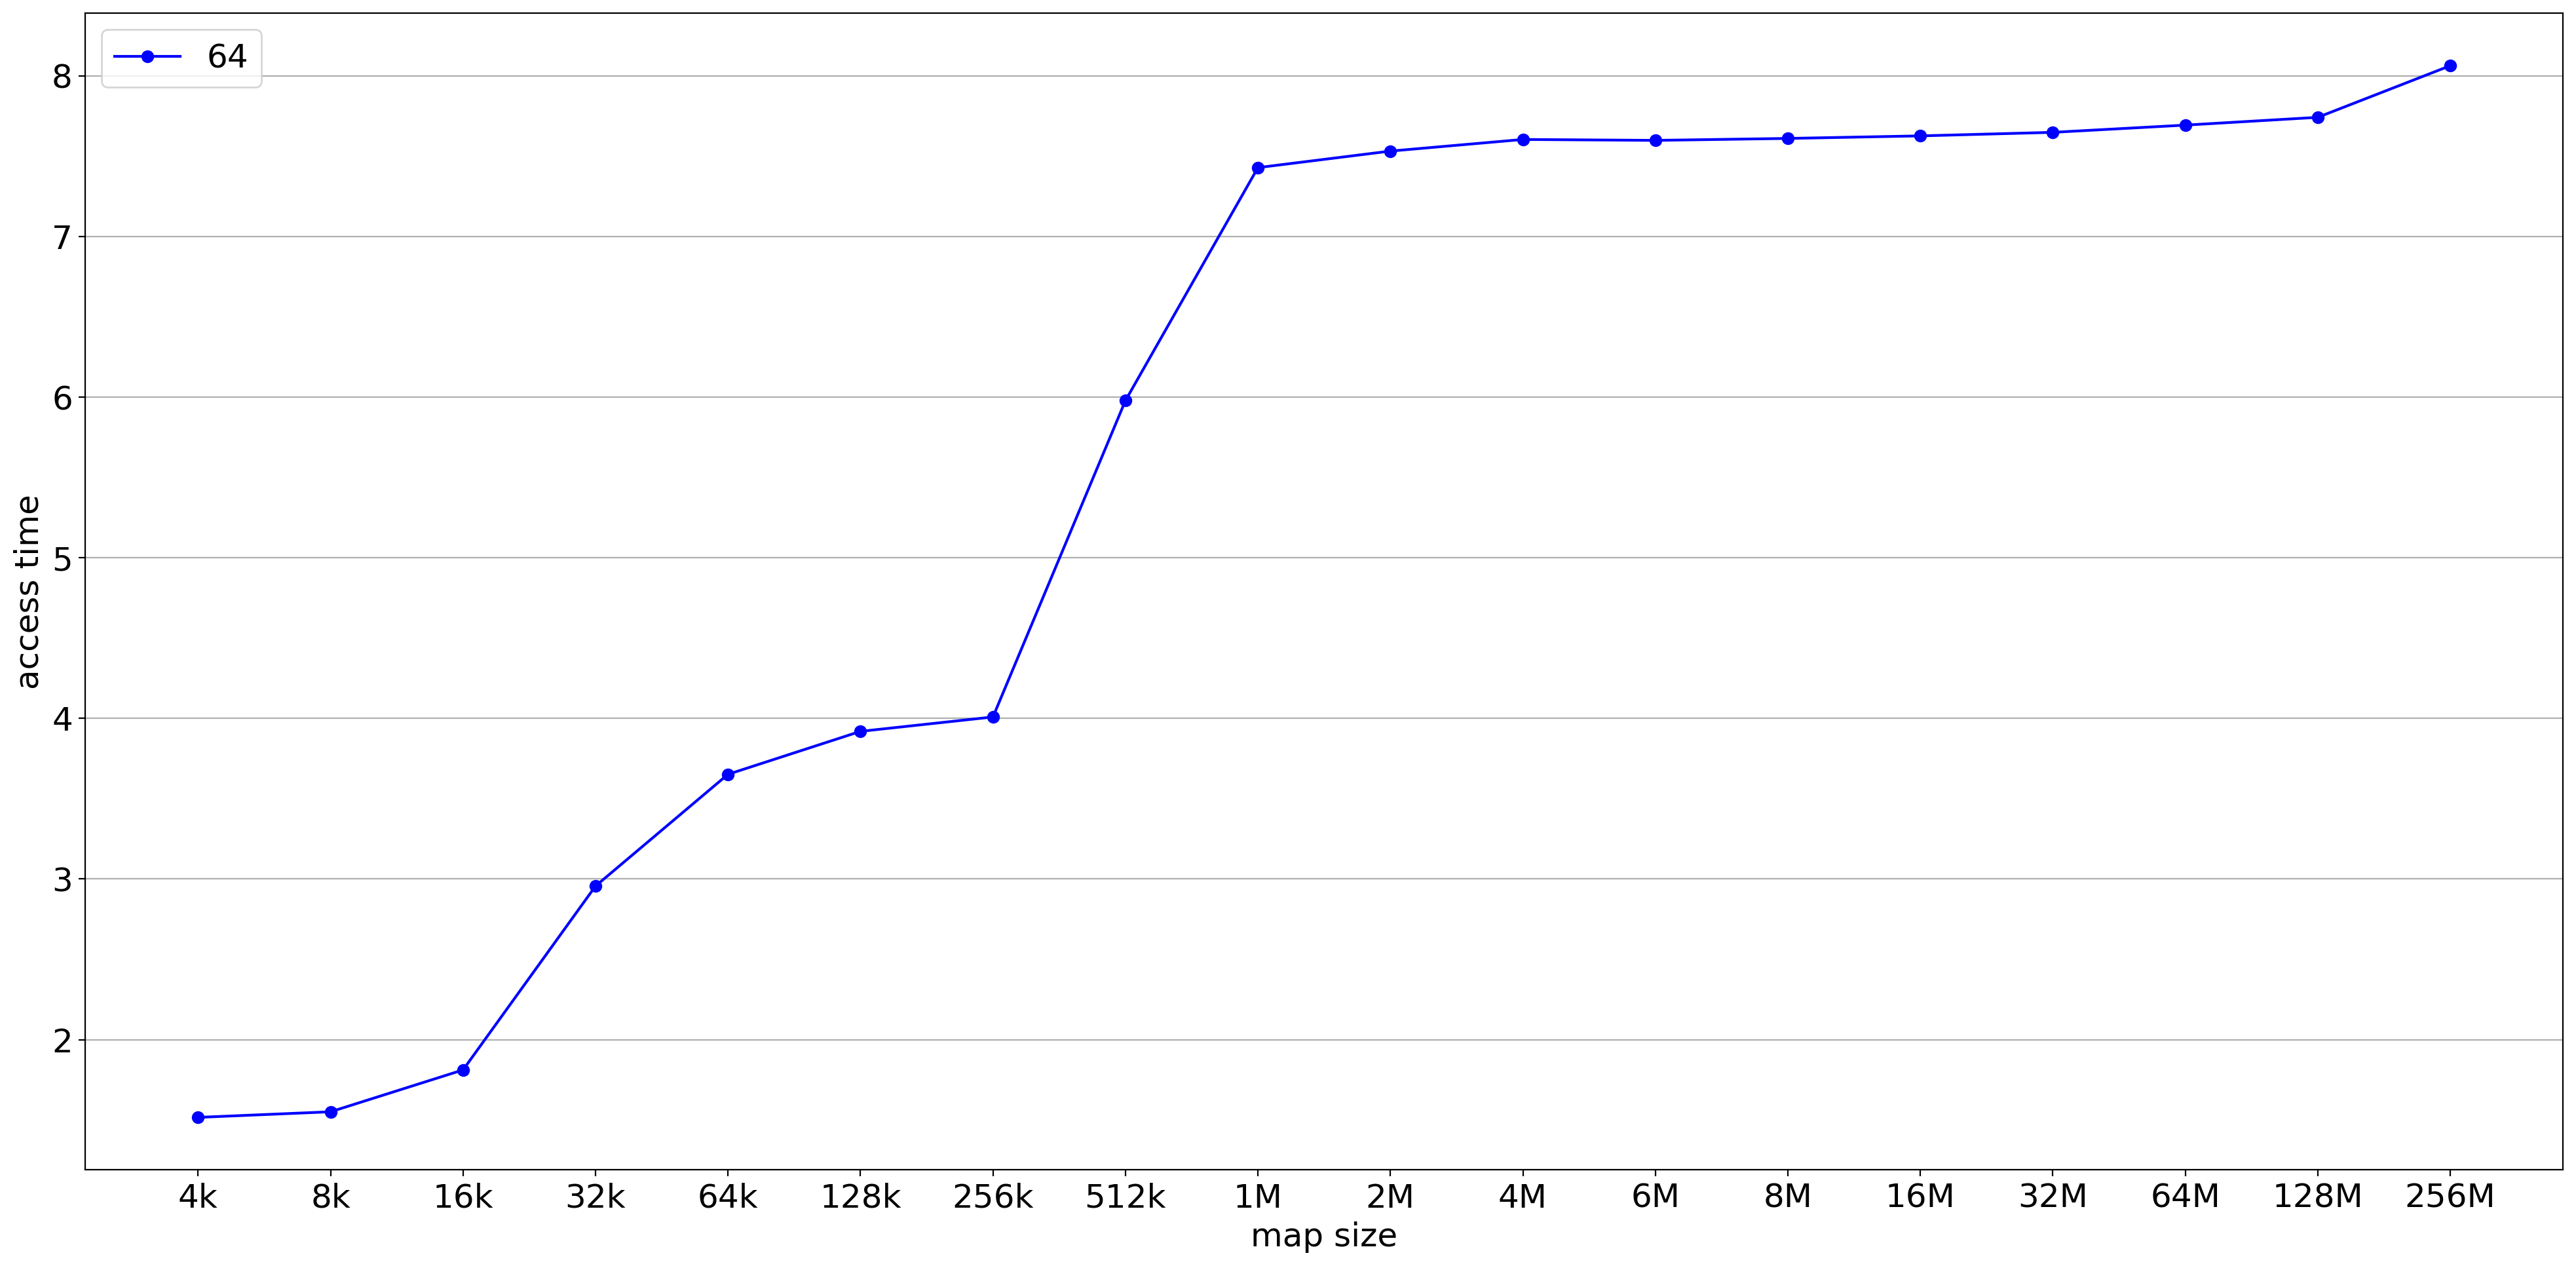

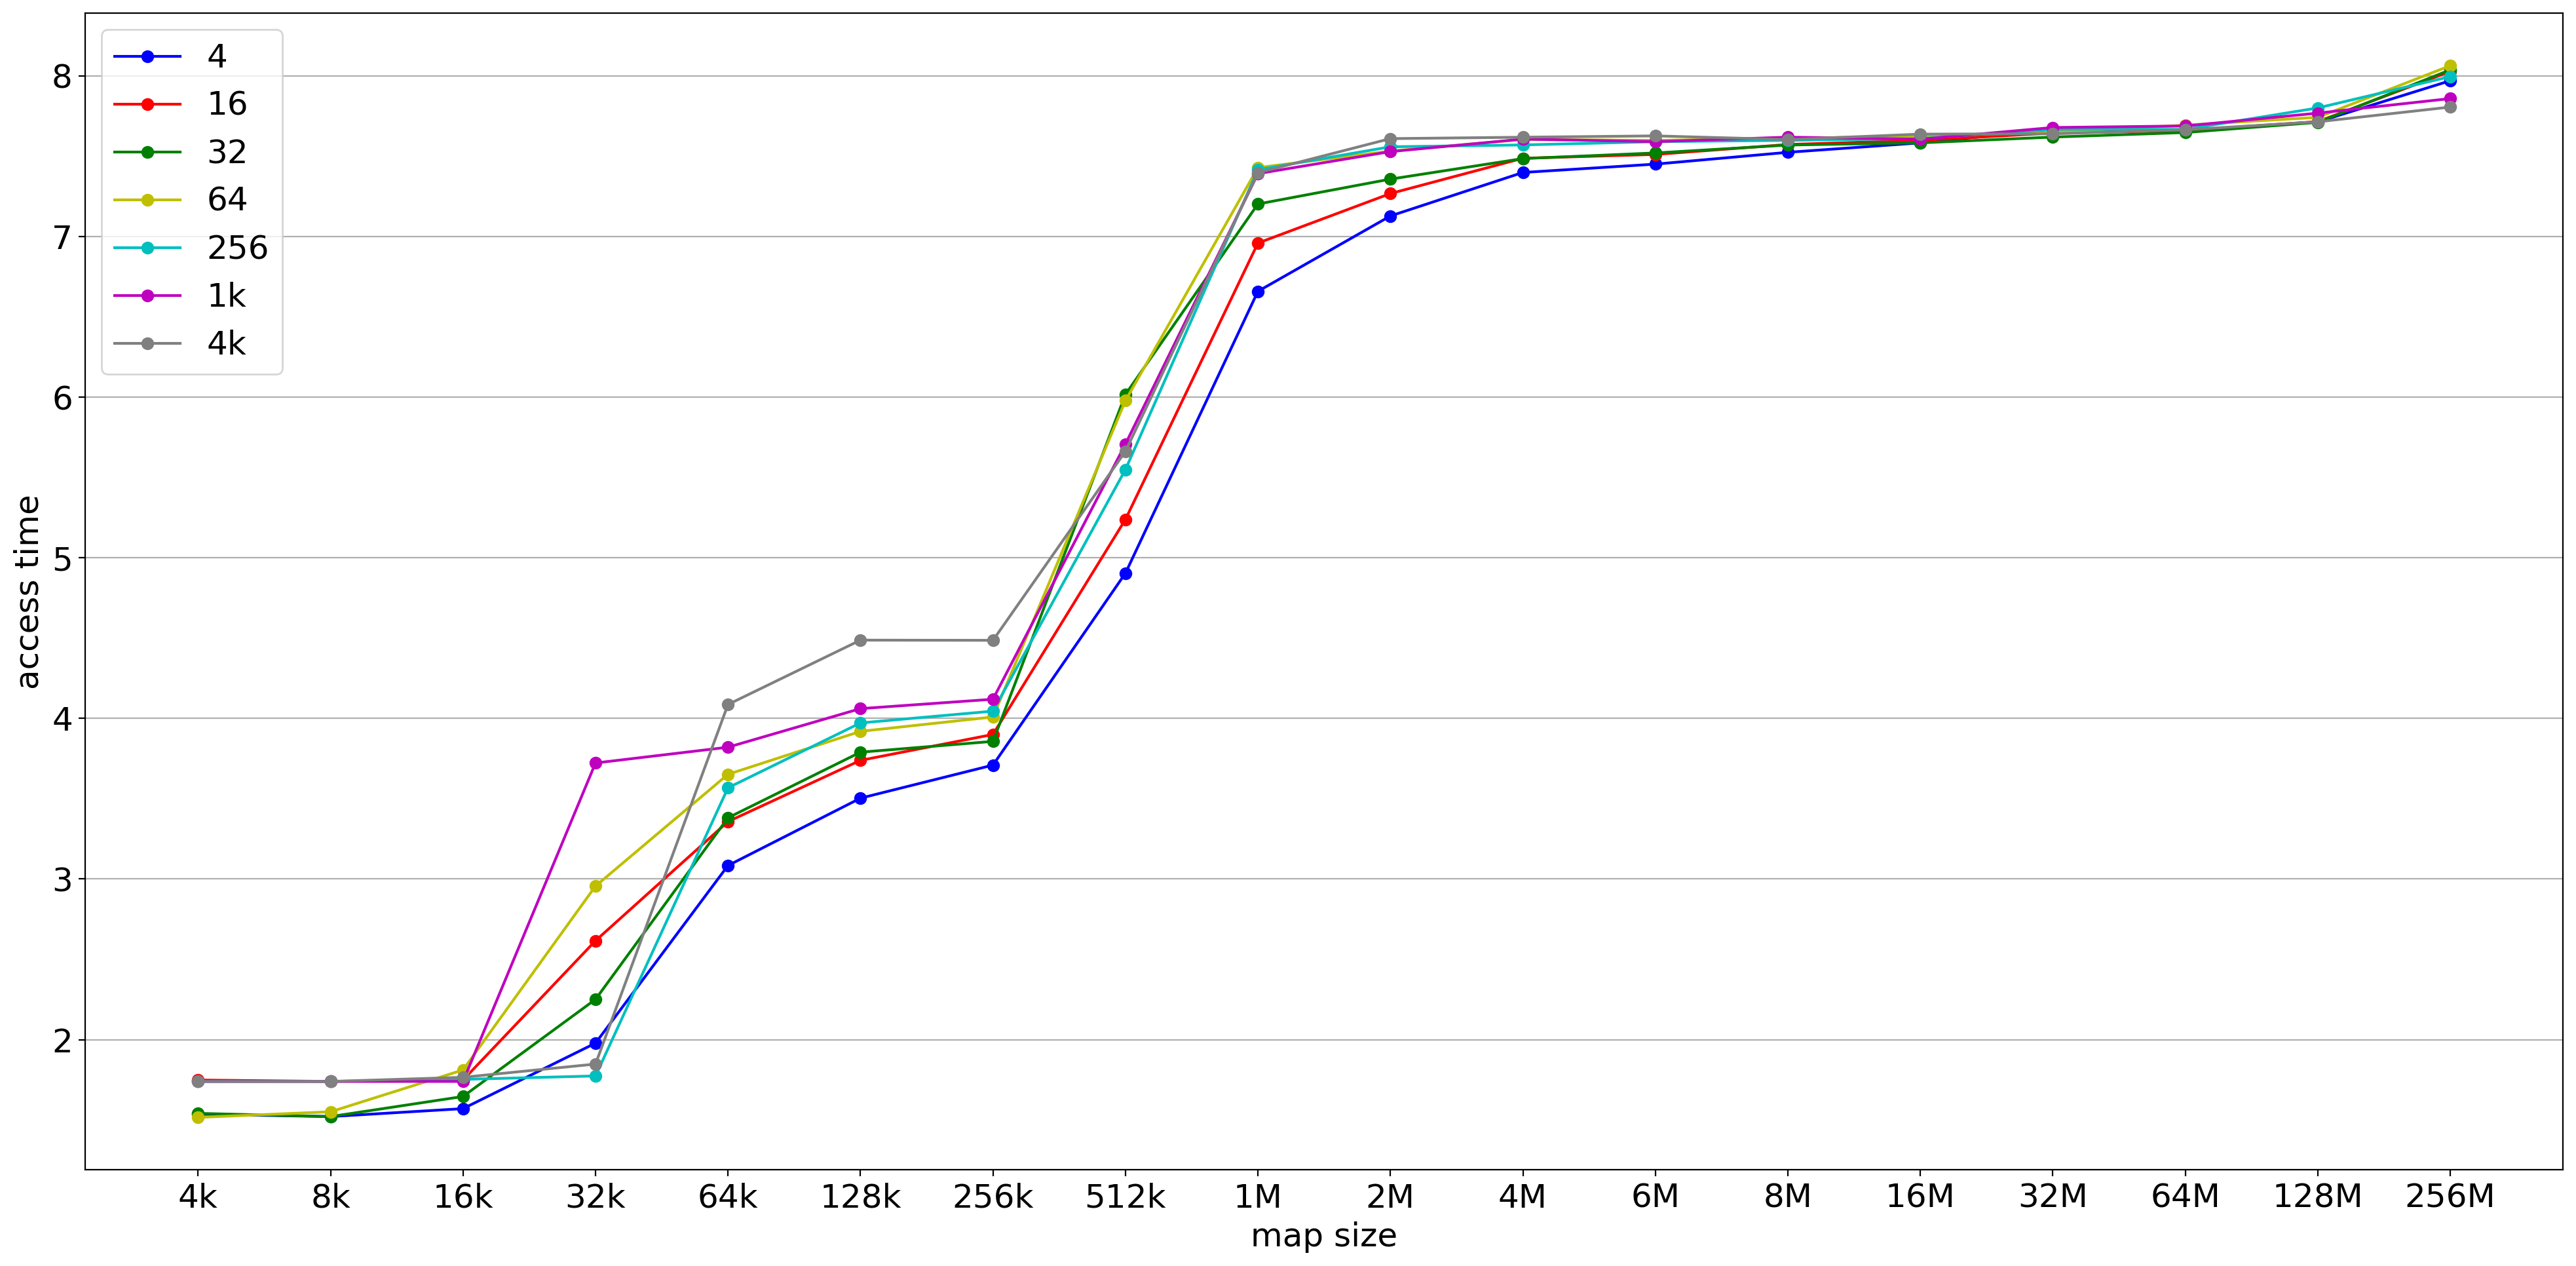

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
plt.rcParams['figure.figsize'] = [20, 10]
plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size': 18})

strides = (4, 16, 32, 64, 256, '1k', '4k')
colors = ('b', 'r', 'g', 'y', 'c', 'm', 'gray')

def draw(name, strides, log):
    plt.figure()
    for stride, color in zip(strides, colors):
        data = pd.read_csv(f'outs/{stride}.csv')
        data.drop('cycle', axis=1, inplace=True)
        sizes = data['size'].values
        nss = data['ns'].values
        if log:
            nss = np.log2(nss)
        plt.plot(sizes, nss, 'o-', color=color, label=stride)
    plt.grid(True, axis='y')
    plt.legend()
    plt.xlabel('map size')
    plt.ylabel('access time')
    plt.tight_layout()
    plt.savefig(f'outs/{name}.png')

draw('figure1', (64,), False)
draw('figure2', strides, False)
draw('figure3', (64,), True)
draw('figure4', strides, True)